In [1]:
import os

In [9]:
data_dir = "C:\\Users\\AJ\\Desktop\\GIT\\CNN\\New folder\\cell_images"

In [10]:
os.listdir(data_dir)

['test', 'train']

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread

In [13]:
train_path = data_dir + '\\train\\'
test_path = data_dir + '\\test\\'

In [16]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [17]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [21]:
os.listdir(train_path + 'uninfected//')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [28]:
img = train_path + 'uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [29]:
img

'C:\\Users\\AJ\\Desktop\\GIT\\CNN\\New folder\\cell_images\\train\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

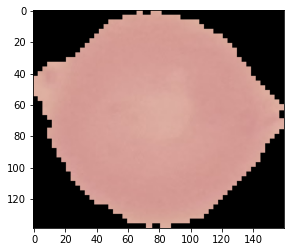

In [36]:
plt.imshow(img)

In [41]:
dim1 = []
dim2 = []

for i in os.listdir(train_path + 'uninfected'):
    path = train_path + 'uninfected\\' + i
    rd = imread(path)
    d1,d2,c = rd.shape
    dim1.append(d1)
    dim2.append(d2)

In [45]:
len(dim1)

12479

In [46]:
len(dim2)

12479

In [47]:
image_shape = (130,130,3)

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##DATA AUGMENTATION

In [49]:
image_gen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.1,
    zoom_range=0.1,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

In [50]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [55]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape = (130,130,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape = (130,130,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape = (130,130,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)      

In [58]:
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [59]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [60]:
batch_size = 16

In [61]:
train_image_gen = image_gen.flow_from_directory(
    train_path,
    target_size=(130, 130),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=16,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest',
) 

Found 24958 images belonging to 2 classes.


In [63]:
test_image_gen = image_gen.flow_from_directory(
    test_path,
    target_size=(130, 130),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=16,
    shuffle=False,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest',
) 

Found 2600 images belonging to 2 classes.


In [64]:
result = model.fit_generator(
    train_image_gen,
    steps_per_epoch=None,
    epochs=20,
    verbose=1,
    callbacks=[early_stop],
    validation_data=test_image_gen,
    validation_steps=None,
    validation_freq=1,
    class_weight=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    shuffle=True,
    initial_epoch=0,
)


## This model takes too much time to train so I have loaded a pretrained model below which is similar to this

C:\Users\AJ\AppData\Local\Temp/ipykernel_21676/3726721671.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result = model.fit_generator(


Epoch 1/20
1560/1560 [==============================] - 470s 300ms/step - loss: 0.9072 - accuracy: 0.5538 - val_loss: 0.6848 - val_accuracy: 0.5842
Epoch 2/20
1424/1560 [==========================>...] - ETA: 37s - loss: 0.6801 - accuracy: 0.5766

KeyboardInterrupt: 

In [65]:
from tensorflow.keras.models import load_model

model = load_model('malaria_detector.h5')

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [69]:
model.evaluate(test_image_gen)

163/163 [==============================] - 26s 159ms/step - loss: 34.7558 - accuracy: 0.8696


[34.755775451660156, 0.869615375995636]

In [70]:
model.metrics_names

['loss', 'accuracy']

In [72]:
pred = model.predict(test_image_gen)

In [74]:
predictions = pred>0.5

In [75]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [76]:
from sklearn.metrics import classification_report,confusion_matrix

In [77]:
y_true = test_image_gen.classes

In [78]:
y_true

array([0, 0, 0, ..., 1, 1, 1])

In [79]:
print(classification_report(y_true,predictions))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1300
           1       0.98      0.76      0.85      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600



In [80]:
print(confusion_matrix(y_true,predictions))

[[1275   25]
 [ 316  984]]
